In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!cd "/content/drive/My Drive/"
!ls

drive  sample_data


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Data_Mining/forestfires.csv')
# df = df.dropna()
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# PRE-PROCESSING

## Explore Data

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

# EDA

## Univariate Non-graphical EDA

### Tabulation

In [ ]:
df['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [ ]:
df['temp'].value_counts()

17.4    8
19.6    8
15.4    7
20.6    7
20.4    6
       ..
16.3    1
12.8    1
10.4    1
8.7     1
25.6    1
Name: temp, Length: 192, dtype: int64

In [ ]:
df['wind'].value_counts()

3.1    53
2.2    53
4.0    51
4.9    48
2.7    44
5.4    41
4.5    41
3.6    40
1.8    31
5.8    24
6.3    19
1.3    14
7.6    14
0.9    13
8.5     8
6.7     8
8.0     5
7.2     4
9.4     4
8.9     1
0.4     1
Name: wind, dtype: int64

In [ ]:
df['RH'].value_counts()

27    33
39    24
35    20
43    17
42    17
      ..
96     1
97     1
99     1
18     1
69     1
Name: RH, Length: 75, dtype: int64

In [ ]:
df['FFMC'].value_counts()

92.1    28
91.6    28
91.0    22
91.7    19
92.4    16
        ..
86.9     1
85.2     1
53.4     1
85.1     1
94.4     1
Name: FFMC, Length: 106, dtype: int64

In [ ]:
df['DMC'].value_counts()

99.0     10
129.5     9
231.1     8
142.4     8
35.8      7
         ..
138.1     1
109.2     1
91.6      1
122.3     1
146.0     1
Name: DMC, Length: 215, dtype: int64

In [ ]:
df['DC'].value_counts()

745.3    10
692.6     9
692.3     8
715.1     8
698.6     8
         ..
565.5     1
503.6     1
589.9     1
85.3      1
106.7     1
Name: DC, Length: 219, dtype: int64

In [ ]:
df['ISI'].value_counts()

9.6     23
7.1     21
6.3     20
8.4     17
7.0     17
        ..
16.5     1
2.2      1
8.3      1
2.0      1
1.1      1
Name: ISI, Length: 119, dtype: int64

### Central Tendency & Spread

In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Skewness & Kurtosis

In [ ]:
df.skew()

<ipython-input-18-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


X        0.036246
Y        0.417296
FFMC    -6.575606
DMC      0.547498
DC      -1.100445
ISI      2.536325
temp    -0.331172
RH       0.862904
wind     0.571001
rain    19.816344
area    12.846934
dtype: float64

In [ ]:
df.kurt()

<ipython-input-19-8bd0d54cd88d>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


X        -1.172331
Y         1.420553
FFMC     67.066041
DMC       0.204822
DC       -0.245244
ISI      21.458037
temp      0.136166
RH        0.438183
wind      0.054324
rain    421.295964
area    194.140721
dtype: float64

## Univariate Graphical

### Histogram

<Axes: ylabel='Frequency'>

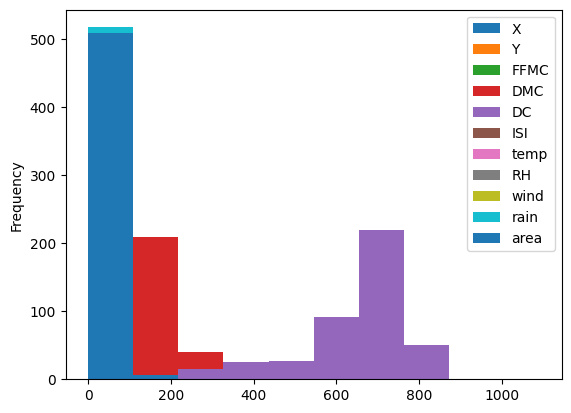

In [ ]:
df.plot.hist()

<Axes: ylabel='Frequency'>

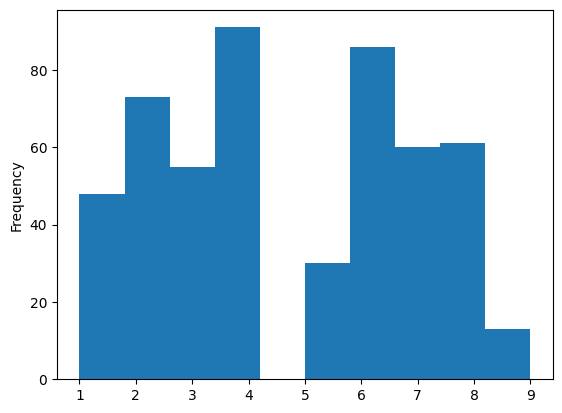

In [ ]:
df['X'].plot.hist()

<Axes: ylabel='Frequency'>

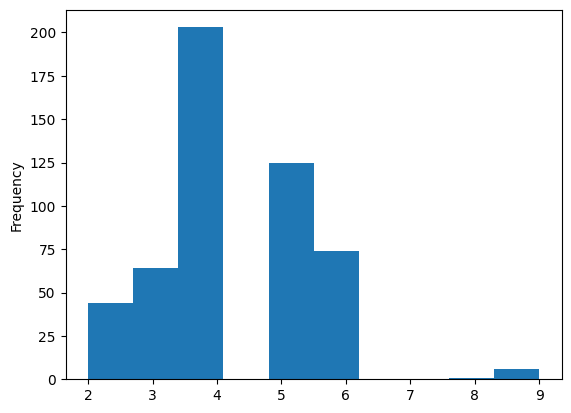

In [ ]:
df['Y'].plot.hist()

<Axes: ylabel='Frequency'>

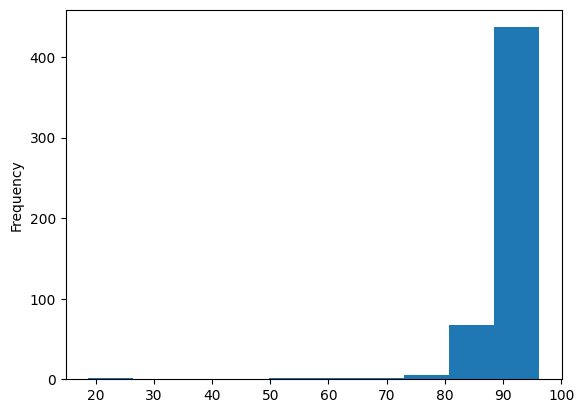

In [ ]:
df['FFMC'].plot.hist()

<Axes: ylabel='Frequency'>

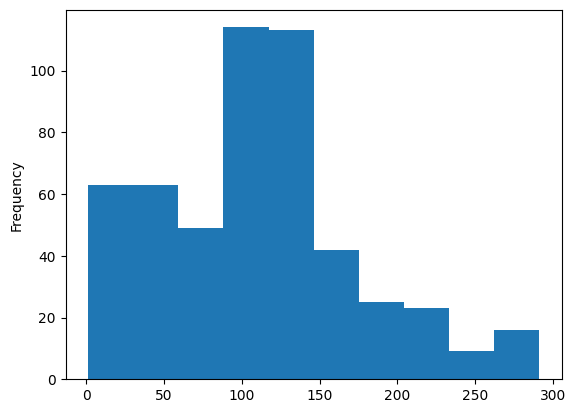

In [ ]:
df['DMC'].plot.hist()

<Axes: ylabel='Frequency'>

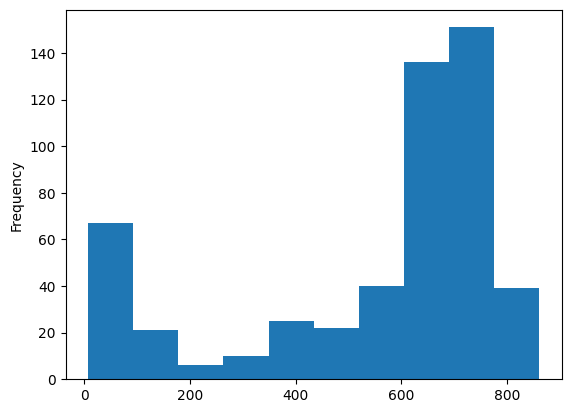

In [ ]:
df['DC'].plot.hist()

<Axes: ylabel='Frequency'>

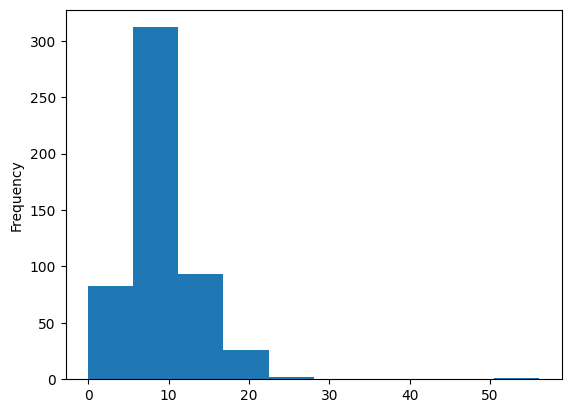

In [ ]:
df['ISI'].plot.hist()

<Axes: ylabel='Frequency'>

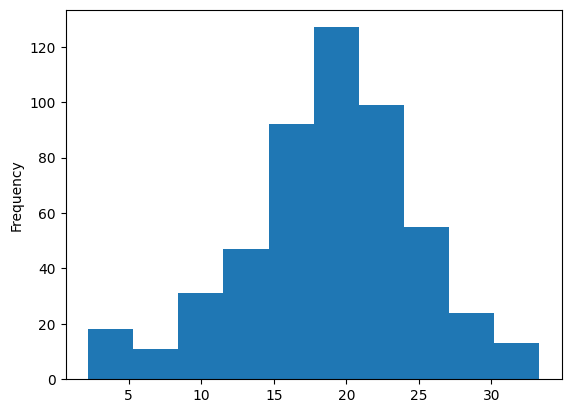

In [ ]:
df['temp'].plot.hist()

<Axes: ylabel='Frequency'>

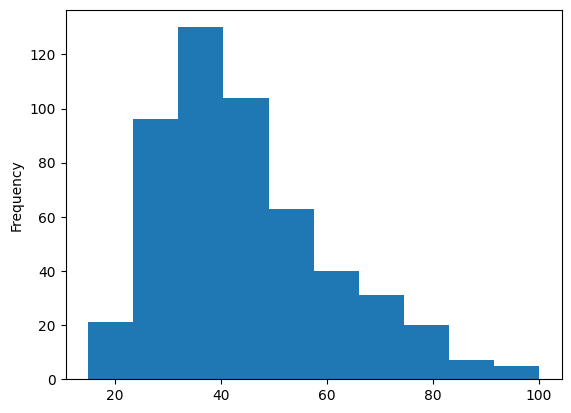

In [ ]:
df['RH'].plot.hist()

<Axes: ylabel='Frequency'>

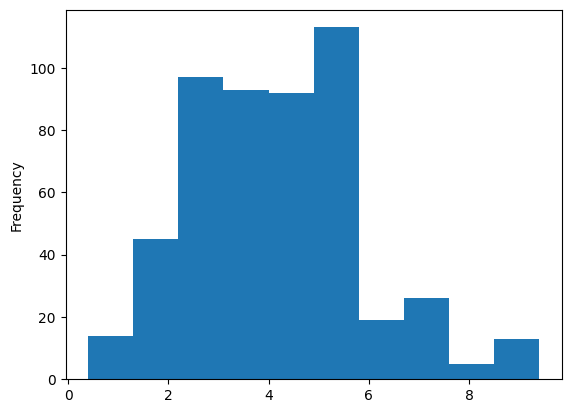

In [ ]:
df['wind'].plot.hist()

<Axes: ylabel='Frequency'>

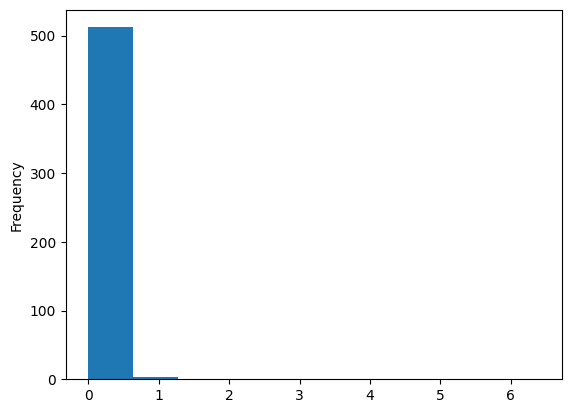

In [ ]:
df['rain'].plot.hist()

<Axes: ylabel='Frequency'>

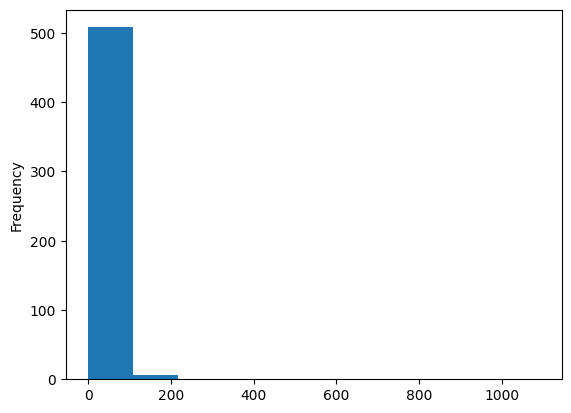

In [ ]:
df['area'].plot.hist()

### Stem & Leaf Plots

In [ ]:
import sys
!{sys.executable} -m pip install stemgraphic
import stemgraphic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=102fa918de041b1452f1a05beef03750759e2d68503fe14d02b913ef4572060a
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


(<Figure size 750x100 with 1 Axes>, <Axes: >)

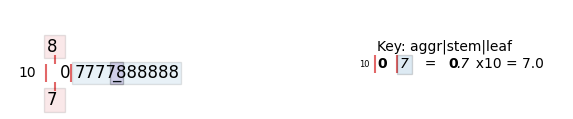

In [ ]:
data = df['X'].head(10)
stemgraphic.stem_graphic(data, scale = 10)

(<Figure size 750x100 with 1 Axes>, <Axes: >)

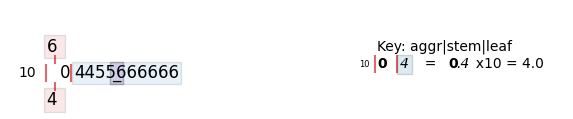

In [ ]:
data = df['Y'].head(10)
stemgraphic.stem_graphic(data, scale = 10)

(<Figure size 750x125 with 1 Axes>, <Axes: >)

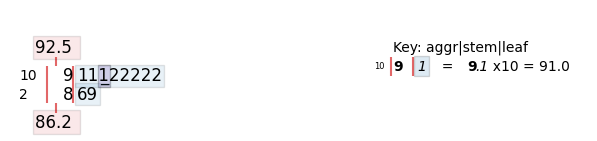

In [ ]:
data = df['FFMC'].head(10)
stemgraphic.stem_graphic(data, scale = 10)

(<Figure size 750x400 with 1 Axes>, <Axes: >)

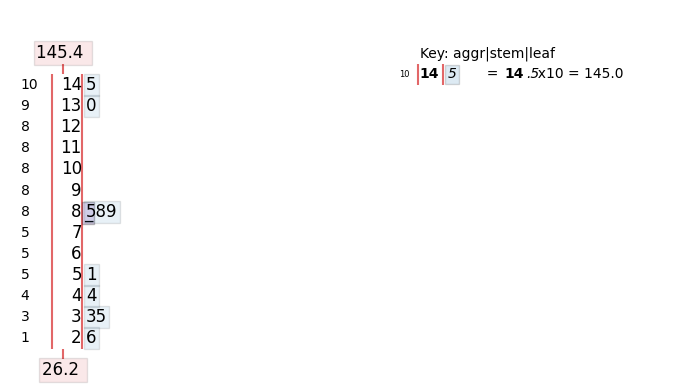

In [ ]:
data = df['DMC'].head(10)
stemgraphic.stem_graphic(data, scale = 10)

(<Figure size 750x1650 with 1 Axes>, <Axes: >)

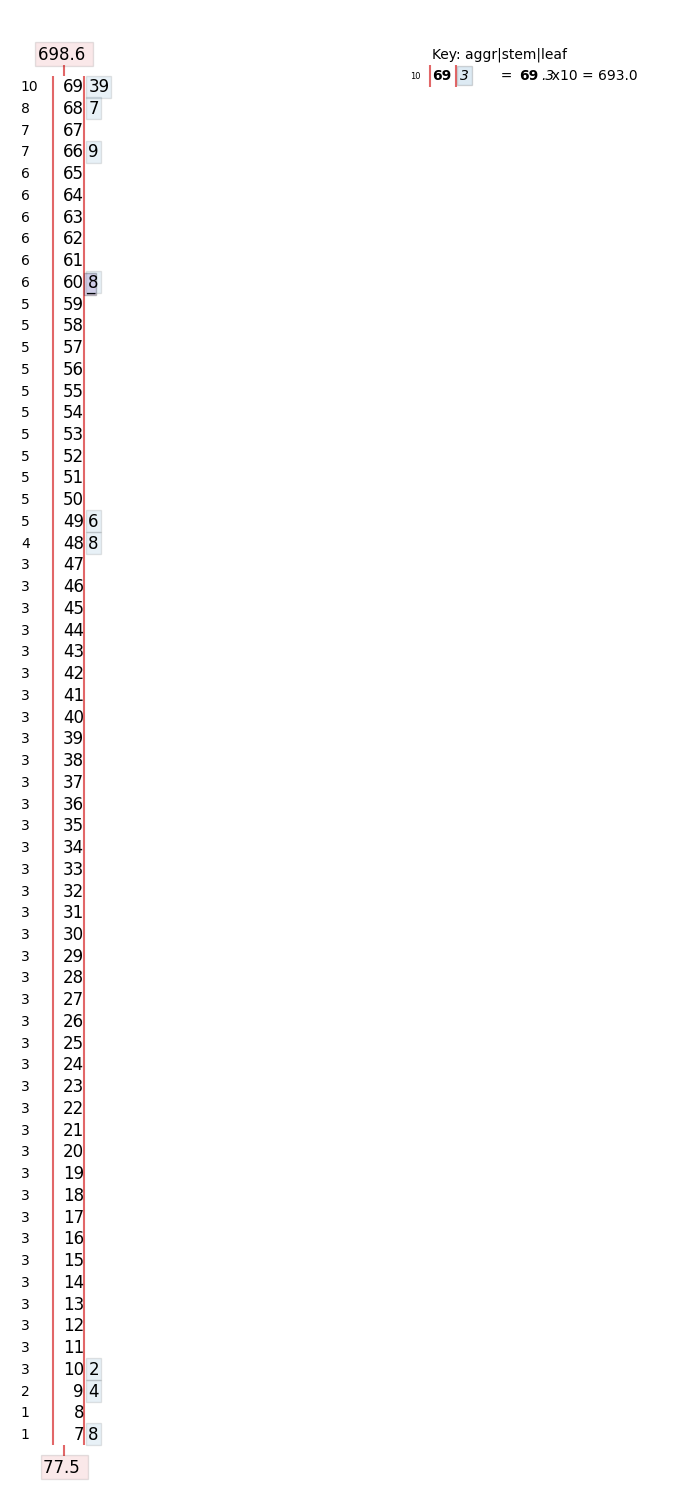

In [ ]:
data = df['DC'].head(10)
stemgraphic.stem_graphic(data, scale = 10)

(<Figure size 750x125 with 1 Axes>, <Axes: >)

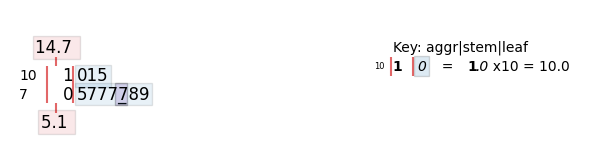

In [ ]:
data = df['ISI'].head(10)
stemgraphic.stem_graphic(data, scale = 10)

(<Figure size 750x150 with 1 Axes>, <Axes: >)

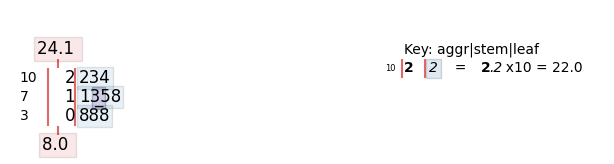

In [ ]:
data = df['temp'].head(10)
stemgraphic.stem_graphic(data, scale = 10)

(<Figure size 750x275 with 1 Axes>, <Axes: >)

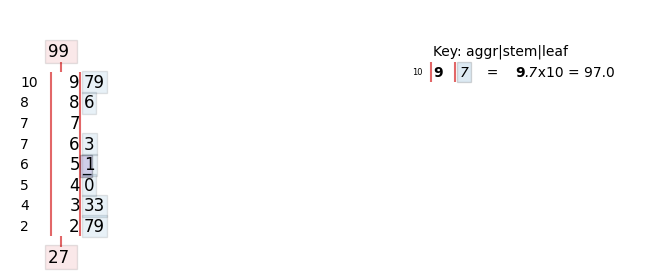

In [ ]:
data = df['RH'].head(10)
stemgraphic.stem_graphic(data, scale = 10)

(<Figure size 750x100 with 1 Axes>, <Axes: >)

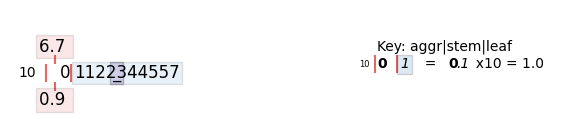

In [ ]:
data = df['wind'].head(10)
stemgraphic.stem_graphic(data, scale = 10)

(<Figure size 750x100 with 1 Axes>, <Axes: >)

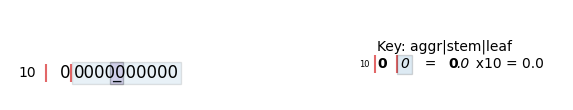

In [ ]:
data = df['rain'].head(10)
stemgraphic.stem_graphic(data, scale = 10)

(<Figure size 750x100 with 1 Axes>, <Axes: >)

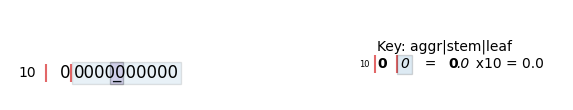

In [ ]:
data = df['area'].head(10)
stemgraphic.stem_graphic(data, scale = 10)

### Boxplots

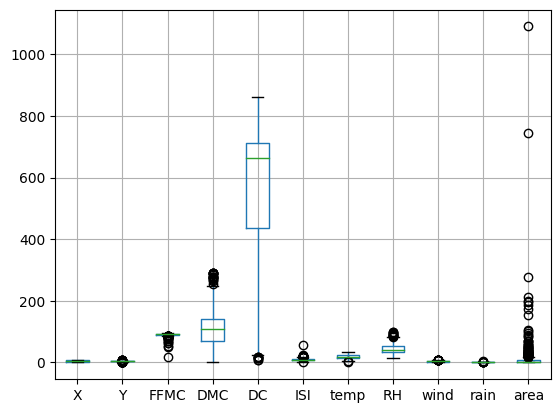

In [ ]:
data = pd.DataFrame(df, columns=['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'])
boxplot = data.boxplot(column=['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'])

### Quantile-normal plots

In [ ]:
import numpy as np
import statsmodels.api as sm
import pylab as py

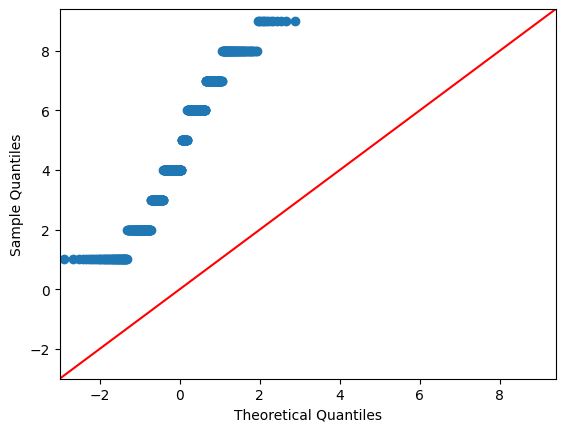

In [ ]:
data_points = df['X']
sm.qqplot(data_points, line ='45')
py.show()

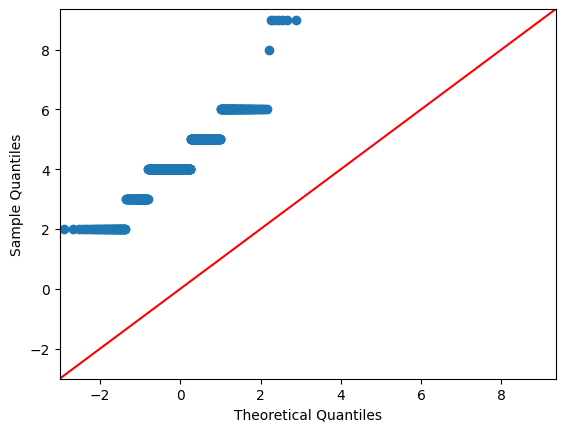

In [ ]:
data_points = df['Y']
sm.qqplot(data_points, line ='45')
py.show()

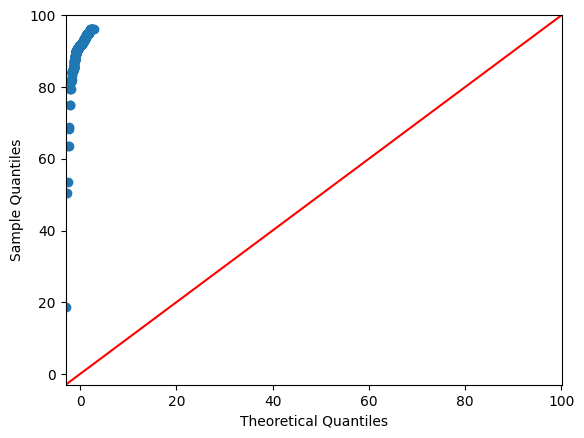

In [ ]:
data_points = df['FFMC']
sm.qqplot(data_points, line ='45')
py.show()

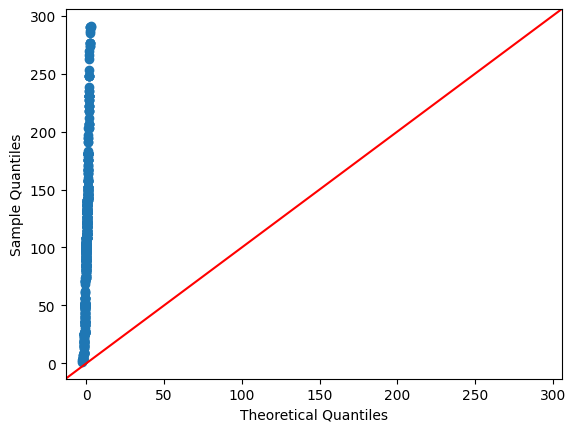

In [ ]:
data_points = df['DMC']
sm.qqplot(data_points, line ='45')
py.show()

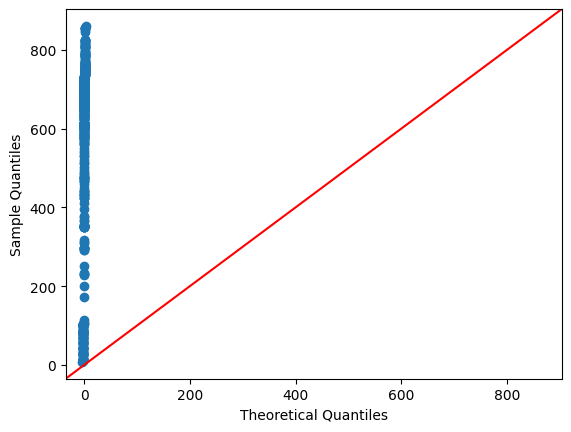

In [ ]:
data_points = df['DC']
sm.qqplot(data_points, line ='45')
py.show()

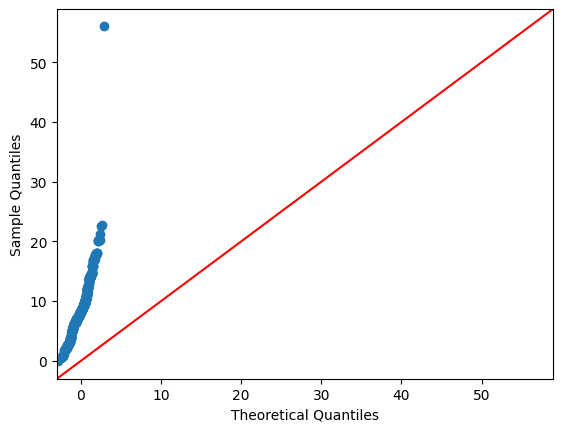

In [ ]:
data_points = df['ISI']
sm.qqplot(data_points, line ='45')
py.show()

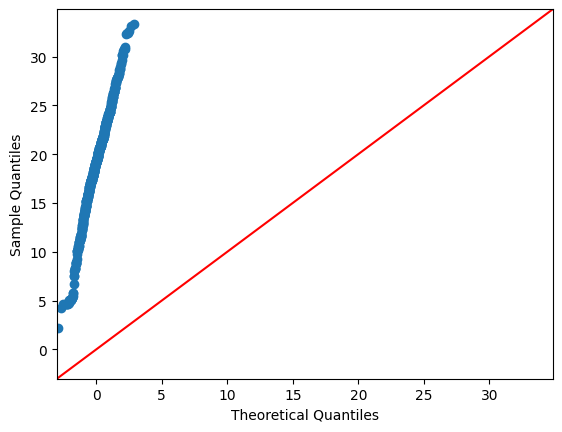

In [ ]:
data_points = df['temp']
sm.qqplot(data_points, line ='45')
py.show()

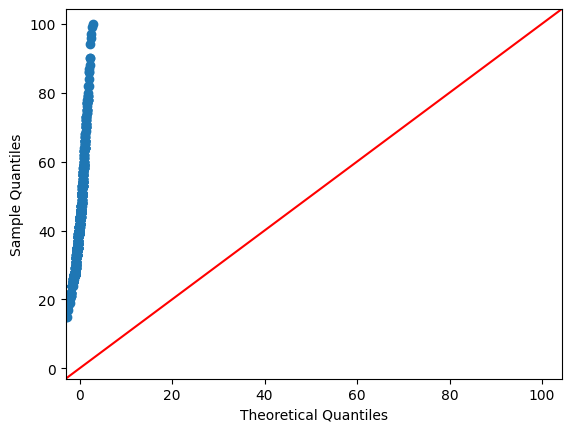

In [ ]:
data_points = df['RH']
sm.qqplot(data_points, line ='45')
py.show()

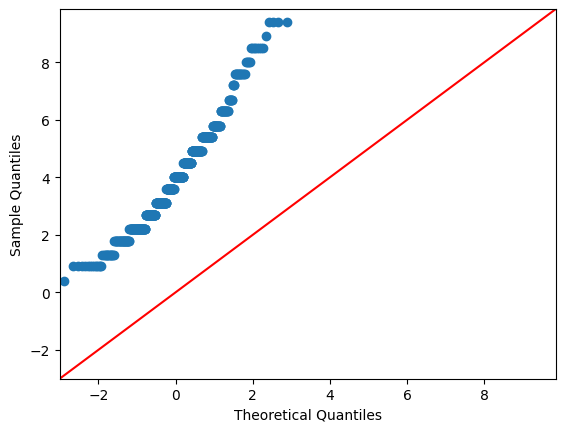

In [ ]:
data_points = df['wind']
sm.qqplot(data_points, line ='45')
py.show()

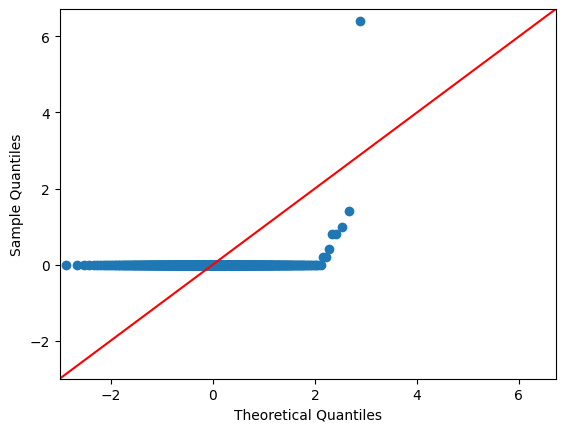

In [ ]:
data_points = df['rain']
sm.qqplot(data_points, line ='45')
py.show()

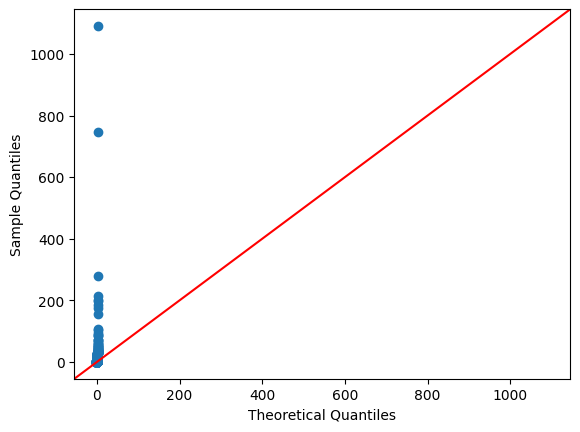

In [ ]:
data_points = df['area']
sm.qqplot(data_points, line ='45')
py.show()

## Multivariate Non-graphical EDA

### Cross Tabulation

In [ ]:
pd.crosstab(df['FFMC'], df['area'], margins=True, normalize=False)

area,0.0,0.09,0.17,0.21,0.24,0.33,0.36,0.41,0.43,0.47,...,154.88,174.63,185.76,196.48,200.94,212.88,278.53,746.28,1090.84,All
FFMC,,,,,,,,,,,,,,,,,,,,,
18.7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50.4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
53.4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63.5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
68.2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95.9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
96.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
96.1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [ ]:
pd.crosstab(df['FFMC'], df['temp'], margins=True, normalize=False)

temp,2.2,4.2,4.6,4.8,5.1,5.2,5.3,5.5,5.8,6.7,...,30.2,30.6,30.8,31.0,32.3,32.4,32.6,33.1,33.3,All
FFMC,,,,,,,,,,,,,,,,,,,,,
18.7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
53.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
68.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
96.0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
96.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,6


In [ ]:
pd.crosstab(df['temp'], df['RH'], margins=True, normalize=False)

RH,15,17,18,19,20,21,22,24,25,26,...,86,87,88,90,94,96,97,99,100,All
temp,,,,,,,,,,,,,,,,,,,,,
2.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4.6,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5.1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32.4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
32.6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
33.1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
pd.crosstab(df['area'], df['temp'], margins=True, normalize=False)

temp,2.2,4.2,4.6,4.8,5.1,5.2,5.3,5.5,5.8,6.7,...,30.2,30.6,30.8,31.0,32.3,32.4,32.6,33.1,33.3,All
area,,,,,,,,,,,,,,,,,,,,,
0.0,0,1,0,0,0,1,2,1,0,1,...,2,0,1,1,0,2,0,0,0,247
0.09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0.17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0.21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0.24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212.88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
278.53,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
746.28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
pd.crosstab(df['DMC'], df['RH'], margins=True, normalize=False)

RH,15,17,18,19,20,21,22,24,25,26,...,86,87,88,90,94,96,97,99,100,All
DMC,,,,,,,,,,,,,,,,,,,,,
1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2.4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
287.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
290.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


### Correlation & Covariance

In [ ]:
df.corr()

<ipython-input-62-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


<ipython-input-63-b915441bfd0a>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



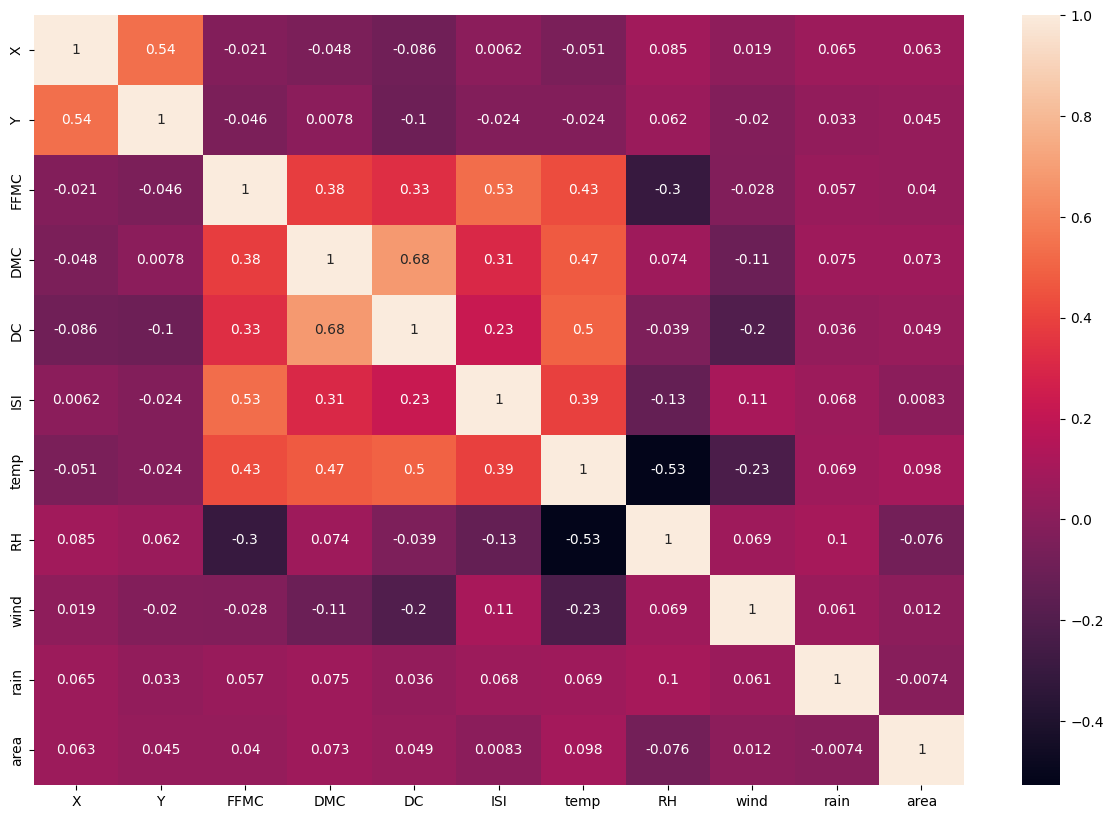

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

## Multivariate Graphical

### Univariate graphs by category

#### X Plot

<Axes: >

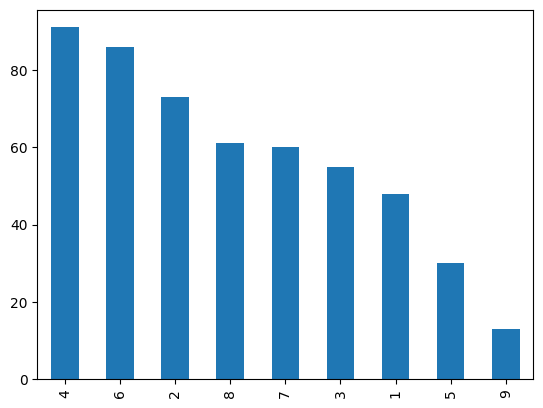

In [ ]:
df['X'].value_counts().plot.bar()

<Axes: >

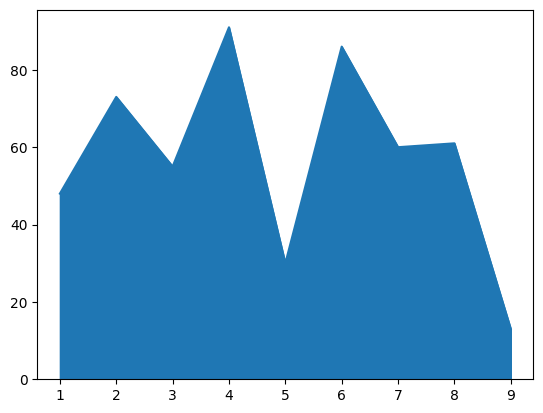

In [ ]:
df['X'].value_counts().sort_index().plot.area()

<Axes: >

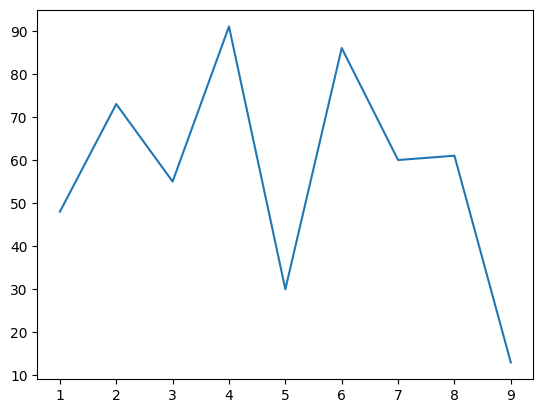

In [ ]:
df['X'].value_counts().sort_index().plot.line()

#### Y Plot

<Axes: >

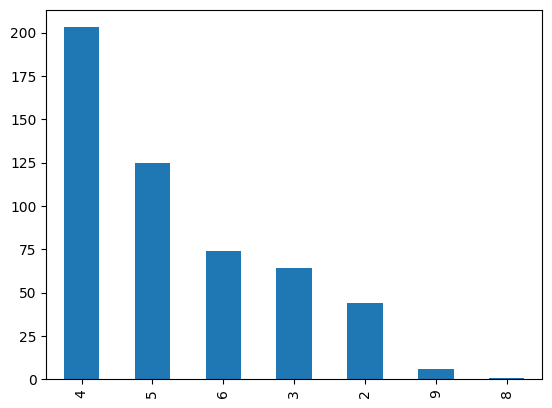

In [ ]:
df['Y'].value_counts().plot.bar()

<Axes: >

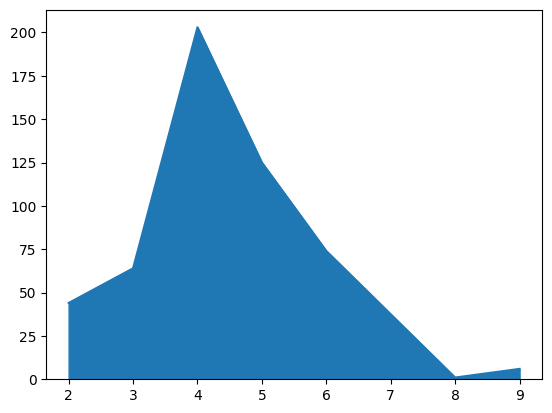

In [ ]:
df['Y'].value_counts().sort_index().plot.area()

<Axes: >

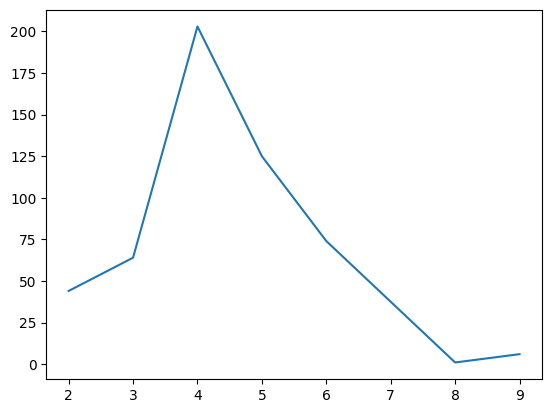

In [ ]:
df['Y'].value_counts().sort_index().plot.line()

#### FFMC Plot

<Axes: >

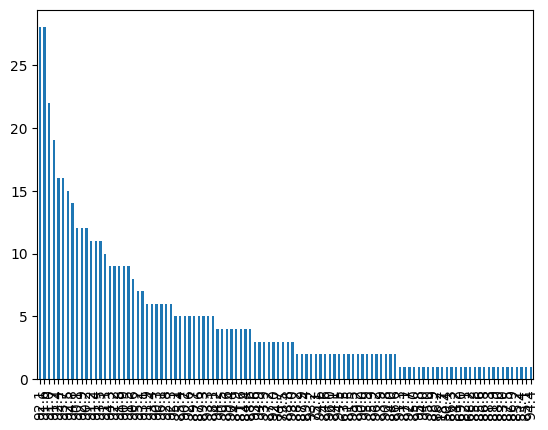

In [ ]:
df['FFMC'].value_counts().plot.bar()

<Axes: >

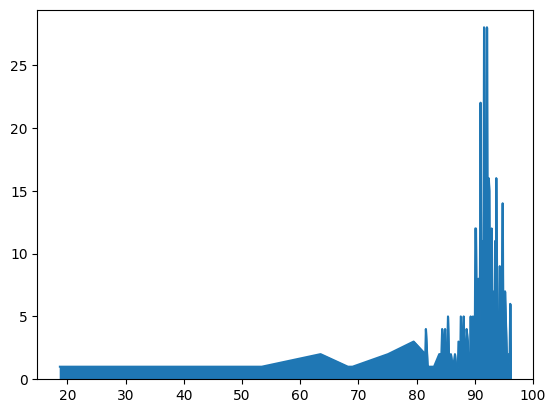

In [ ]:
df['FFMC'].value_counts().sort_index().plot.area()

<Axes: >

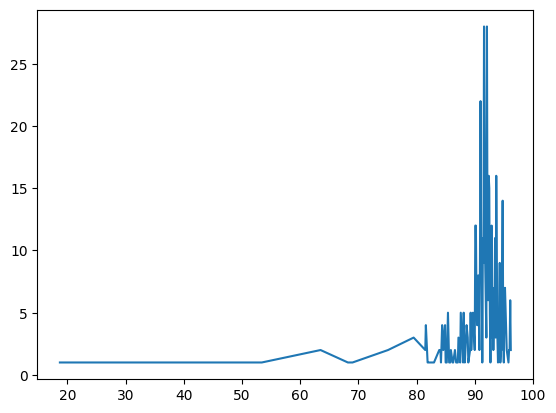

In [ ]:
df['FFMC'].value_counts().sort_index().plot.line()

#### DMC Plot

<Axes: >

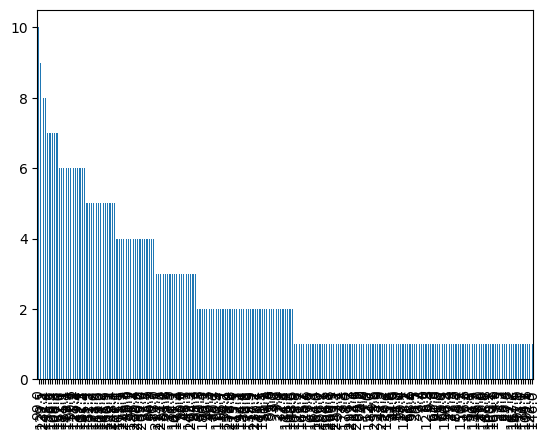

In [ ]:
df['DMC'].value_counts().plot.bar()

<Axes: >

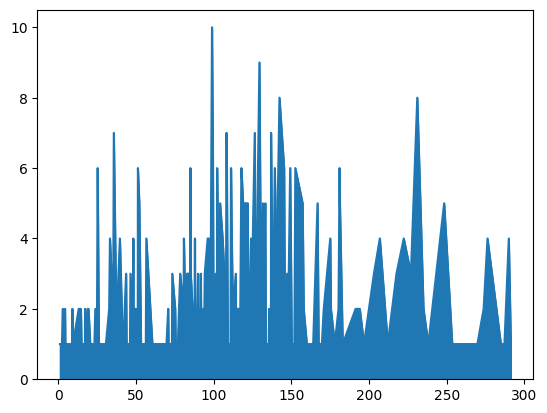

In [ ]:
df['DMC'].value_counts().sort_index().plot.area()

<Axes: >

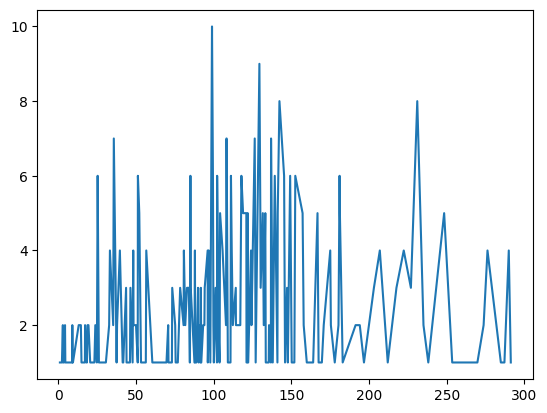

In [ ]:
df['DMC'].value_counts().sort_index().plot.line()

#### DC Plot

<Axes: >

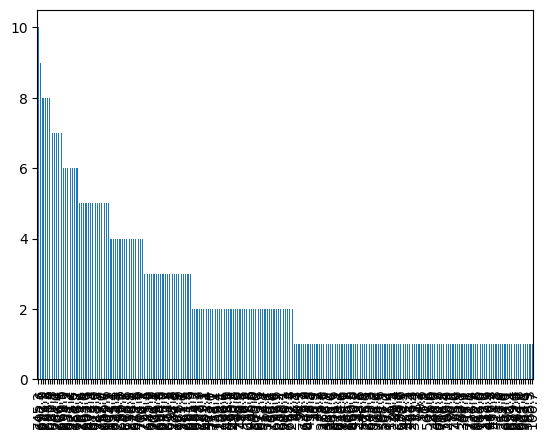

In [ ]:
df['DC'].value_counts().plot.bar()

<Axes: >

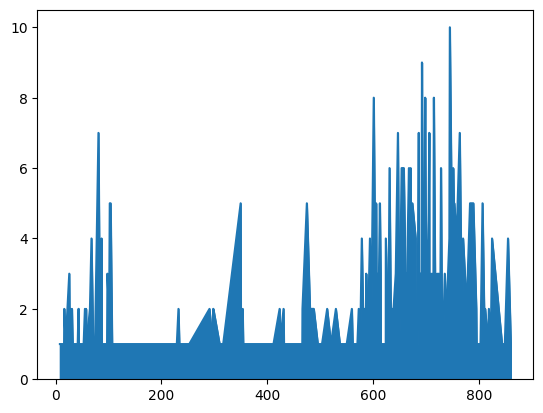

In [ ]:
df['DC'].value_counts().sort_index().plot.area()

<Axes: >

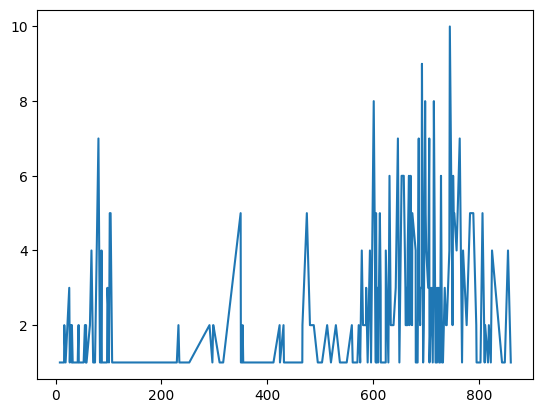

In [ ]:
df['DC'].value_counts().sort_index().plot.line()

#### ISI Plot

<Axes: >

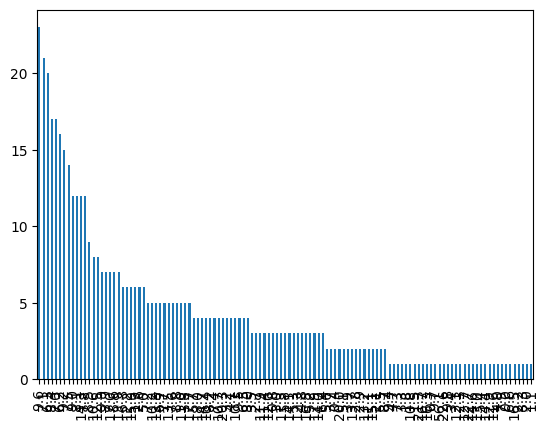

In [ ]:
df['ISI'].value_counts().plot.bar()

<Axes: >

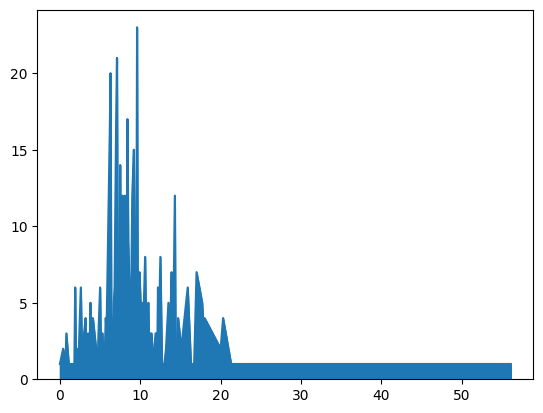

In [ ]:
df['ISI'].value_counts().sort_index().plot.area()

<Axes: >

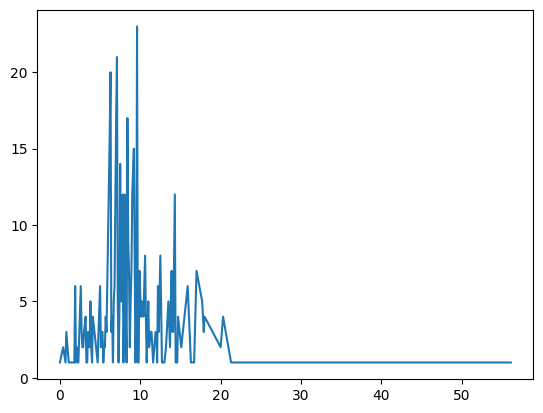

In [ ]:
df['ISI'].value_counts().sort_index().plot.line()

#### Temperature Plot

<Axes: >

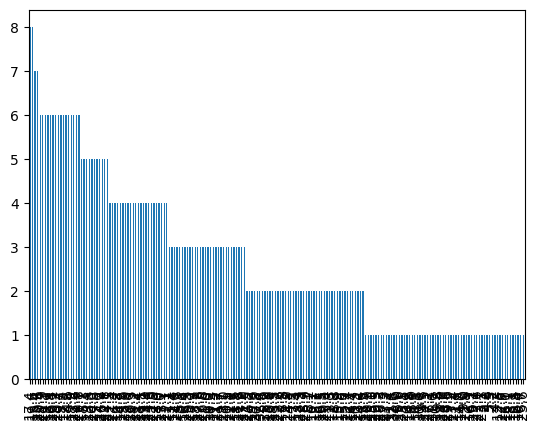

In [ ]:
df['temp'].value_counts().plot.bar()

<Axes: >

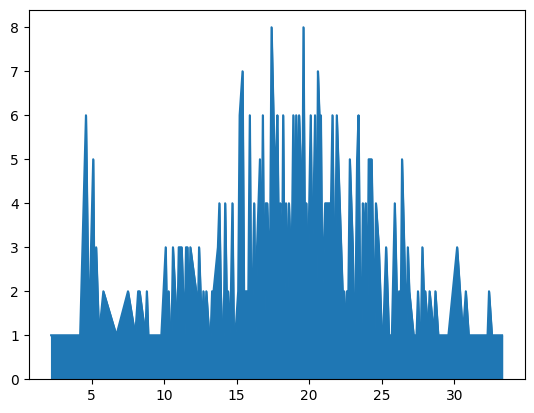

In [ ]:
df['temp'].value_counts().sort_index().plot.area()

<Axes: >

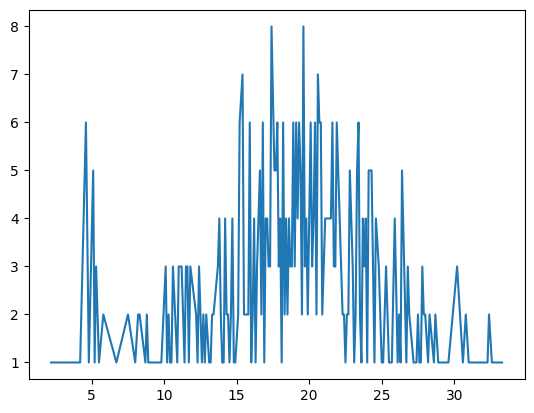

In [ ]:
df['temp'].value_counts().sort_index().plot.line()

#### RH Plot

<Axes: >

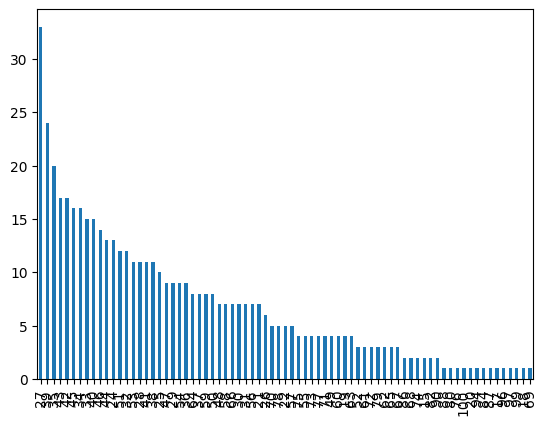

In [ ]:
df['RH'].value_counts().plot.bar()

<Axes: >

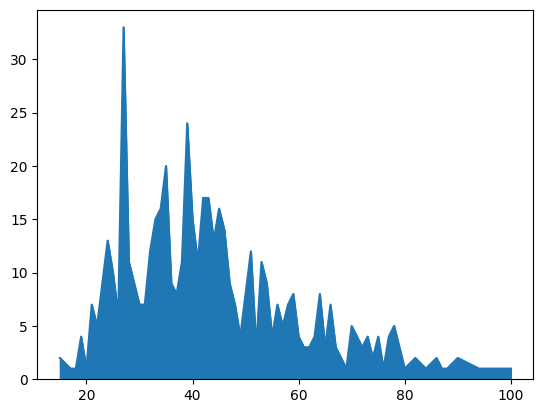

In [ ]:
df['RH'].value_counts().sort_index().plot.area()

<Axes: >

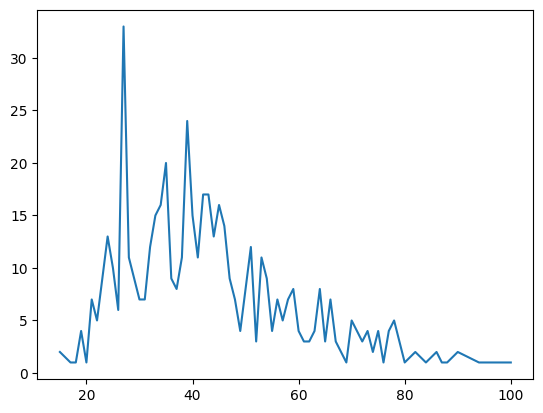

In [ ]:
df['RH'].value_counts().sort_index().plot.line()

#### Wind Plot

<Axes: >

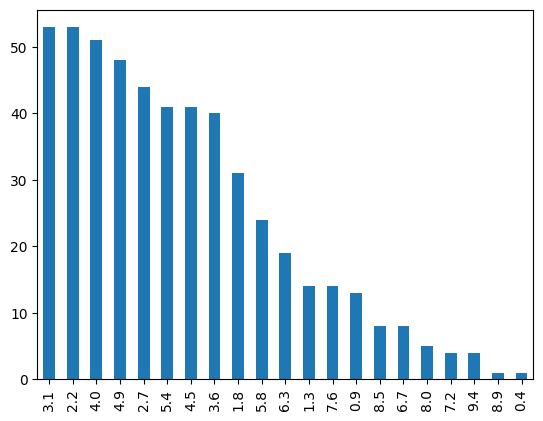

In [ ]:
df['wind'].value_counts().plot.bar()

<Axes: >

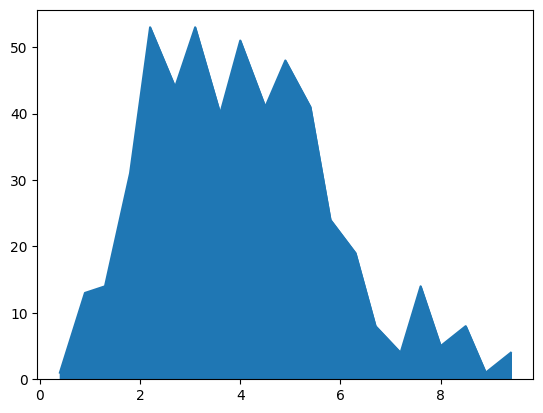

In [ ]:
df['wind'].value_counts().sort_index().plot.area()

<Axes: >

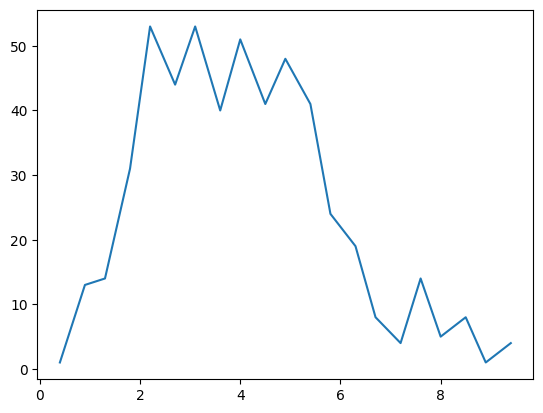

In [ ]:
df['wind'].value_counts().sort_index().plot.line()

#### Rain Plot

<Axes: >

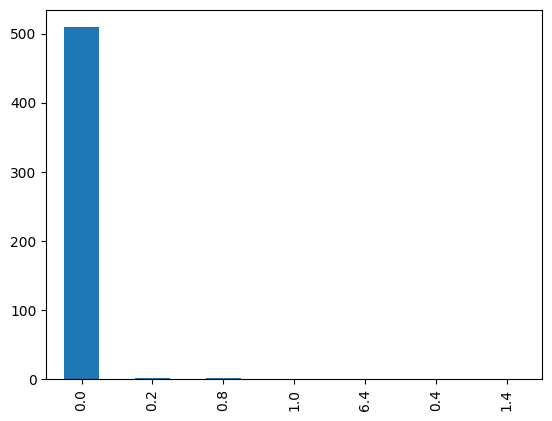

In [ ]:
df['rain'].value_counts().plot.bar()

<Axes: >

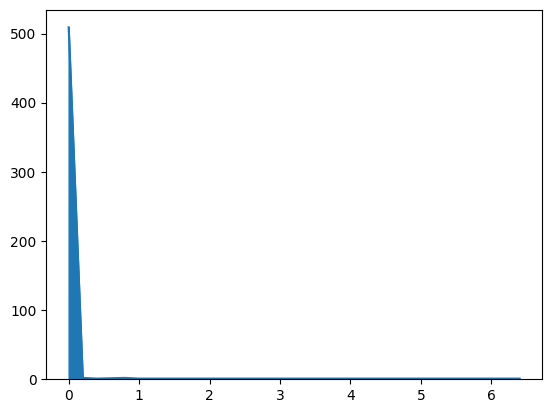

In [ ]:
df['rain'].value_counts().sort_index().plot.area()

<Axes: >

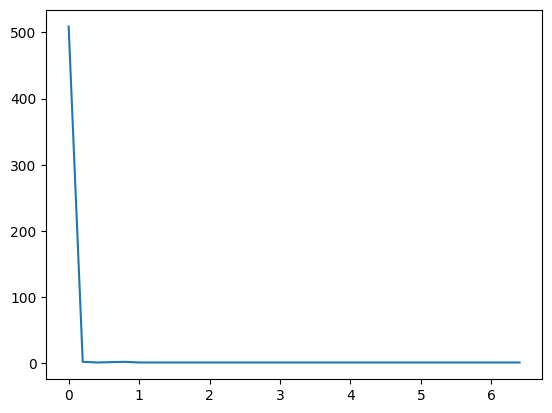

In [ ]:
df['rain'].value_counts().sort_index().plot.line()

#### Area Plot

<Axes: >

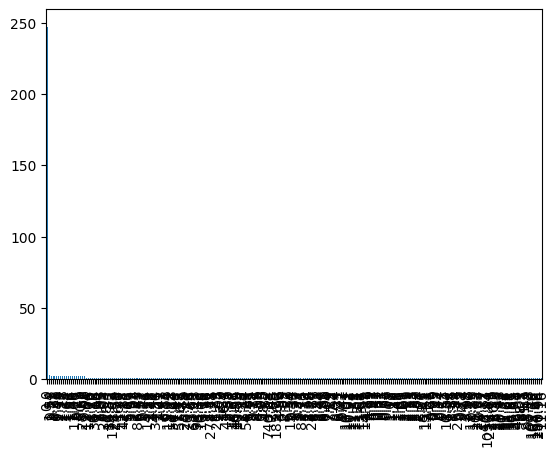

In [ ]:
df['area'].value_counts().plot.bar()

<Axes: >

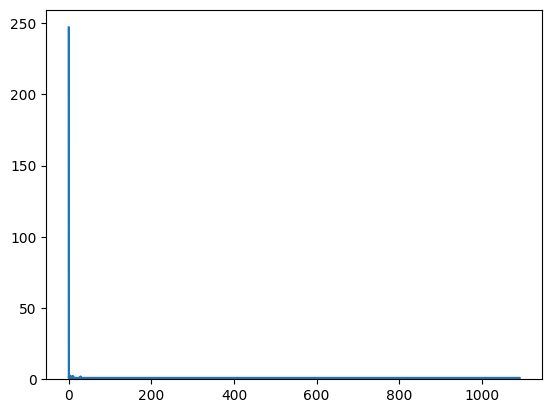

In [ ]:
df['area'].value_counts().sort_index().plot.area()

<Axes: >

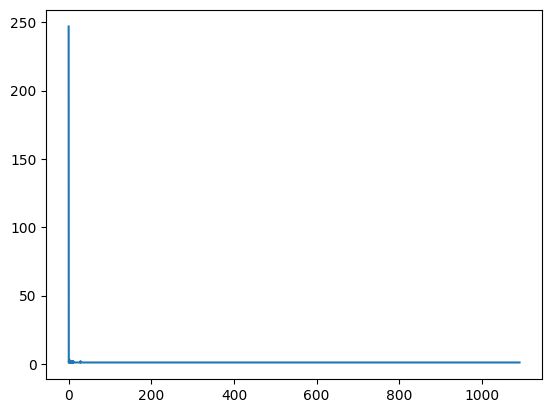

In [ ]:
df['area'].value_counts().sort_index().plot.line()

# REGRESI

## Regresi Linear

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [ ]:
x=df['DMC'].values.reshape(-1,1)

In [ ]:
y=df['DC'].values.reshape(-1,1)

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

In [ ]:
a = lm.intercept_
a

array([254.98438168])

In [ ]:
b = lm.coef_
b

array([[2.642279]])

Text(0.5, 1.0, 'Plot x vs y')

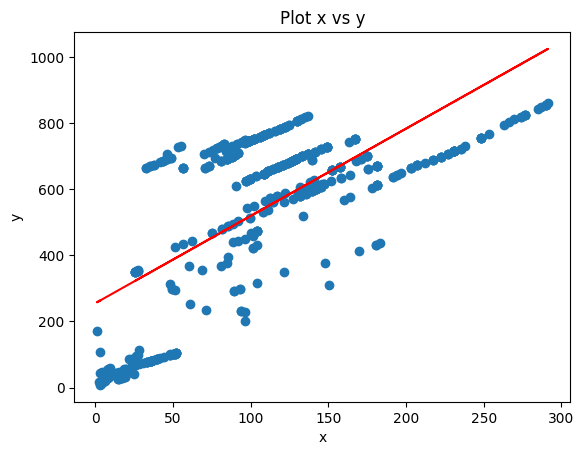

In [ ]:
y_prediksi = model.predict(x)
plt.scatter(x,y)
plt.plot(x, y_prediksi, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot x vs y')

In [ ]:
MSE = mean_squared_error(y, y_prediksi)
R2 = r2_score(y, y_prediksi)

In [ ]:
MSE

32834.85751325115

In [ ]:
R2

0.4653853954603966

## Regresi Non Linear

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Data_Mining/forestfires.csv')

In [ ]:
x=df['temp'].values.reshape(-1,1)
y=df['RH'].values.reshape(-1,1)

In [ ]:
poly = PolynomialFeatures(degree=1)
x_poly = poly.fit_transform(x)

In [ ]:
poly.fit(x_poly, y)

PolynomialFeatures(degree=1)

In [ ]:
linreg = LinearRegression()
linreg.fit(x_poly, y)

LinearRegression()

In [ ]:
y_pred = linreg.predict(x_poly)

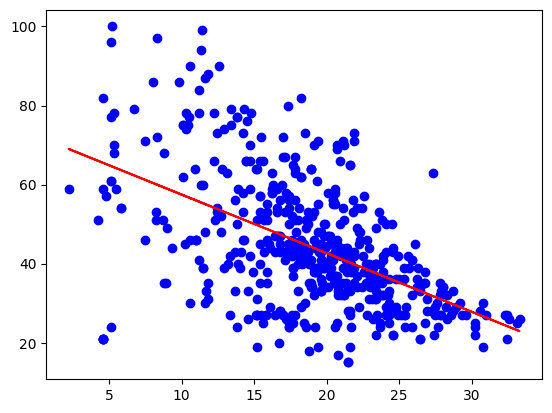

In [ ]:
plt.scatter(x,y, color='blue')
plt.plot(x,y_pred, color='red')
plt.show()

In [ ]:
MSE = mean_squared_error(y, y_prediksi)
R2 = r2_score(y, y_prediksi)

In [ ]:
MSE

282107.10543469776

In [ ]:
R2

-1060.571525655751